#### feature selection techniques


In [1]:
import pandas as pd
df=pd.read_csv('mobile.csv')

In [2]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Univariate selection

In [3]:
X=df.iloc[:,:-1]
Y=df['price_range']

In [4]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [5]:
Y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [6]:
from sklearn.feature_selection import SelectKBest #selectk best is used for which selects the best k features.
from sklearn.feature_selection import chi2

In [7]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,Y)

In [8]:
features_rank=pd.DataFrame(ordered_feature.scores_,columns=['score'])

In [9]:
features_rank.nlargest(10,'score')

,score
13,931267.519053
11,17363.569536
0,14129.866576
12,9810.586750
8,95.972863
6,89.839124
15,16.480319
16,13.236400
4,10.135166
14,9.614878


In [10]:
df_columns=pd.DataFrame(X.columns)

In [11]:
feature_ranks=pd.concat([features_rank,df_columns],axis=1)

In [12]:
feature_ranks.columns=['scores','features']
feature_ranks

,scores,features
0,14129.866576,battery_power
1,0.723232,blue
2,0.648366,clock_speed
3,0.631011,dual_sim
4,10.135166,fc
5,1.521572,four_g
6,89.839124,int_memory
7,0.745820,m_dep
8,95.972863,mobile_wt
9,9.097556,n_cores



### Feature Importance
This technique gives you a score for each feature of your data,the higher the score mor relevant it is



In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [14]:
print(model.feature_importances_)

[0.06042031 0.01971681 0.03288471 0.0196242  0.03389469 0.01718854
 0.03425379 0.03428591 0.03574735 0.03181091 0.0338737  0.04575277
 0.0485023  0.3963531  0.03398328 0.03425602 0.03484011 0.01411184
 0.01849785 0.0200018 ]


In [15]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)

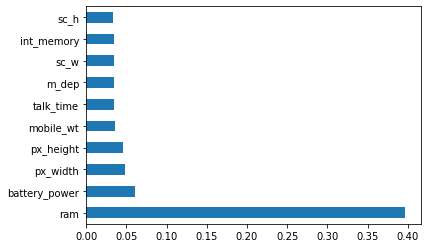

In [16]:
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

### Correlation

In [17]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

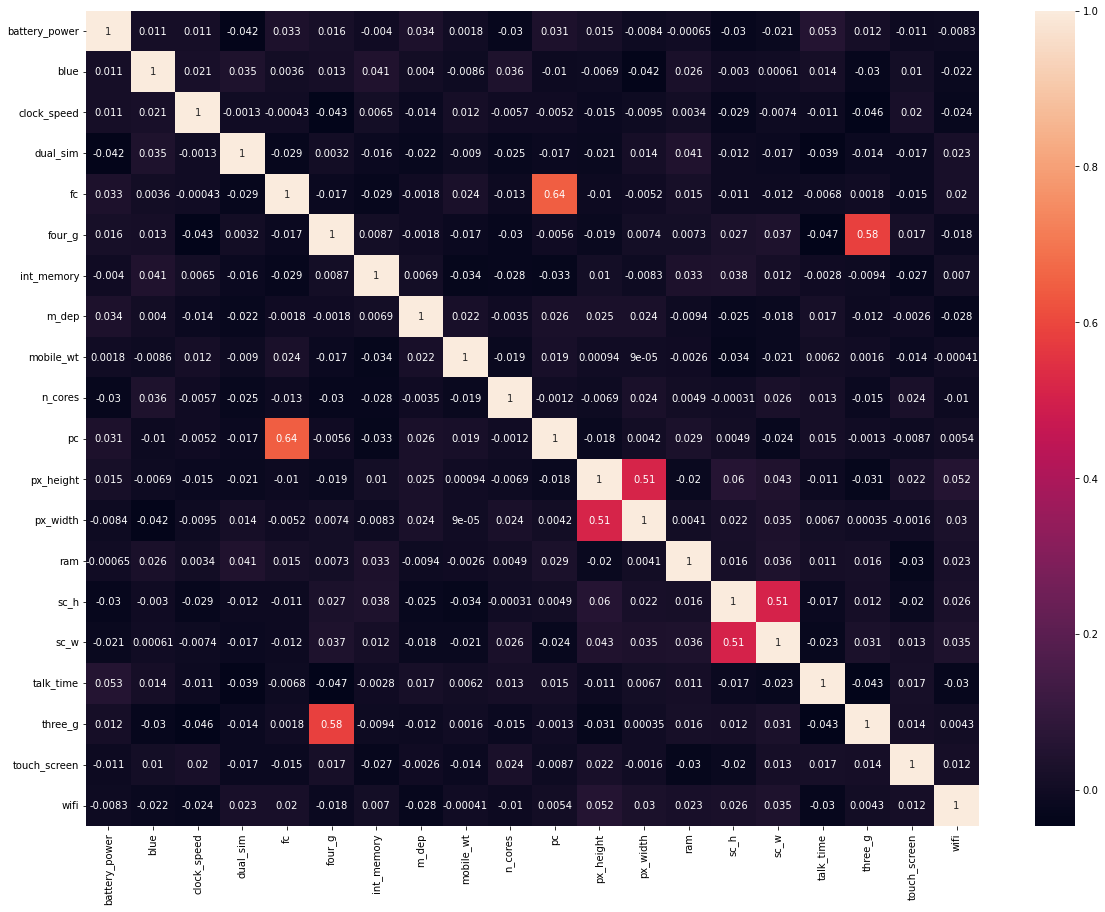

In [18]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,15)
sns.heatmap(df.iloc[:,:-1].corr(),annot=True)

In [34]:
#which are the features have highly correlated we can drop one feature,because that two features gives same value.
#find and removed correlated fetures.
def correlation(dataset,threshold):
    corr_after=[]
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                corr_after.append(col_name)
    return corr_after           

In [35]:
threshold=0.5

In [36]:
correlation(df.iloc[:,:-1],threshold)

['pc', 'px_width', 'sc_w', 'three_g']

### Information Gain

In [37]:
from sklearn.feature_selection import mutual_info_classif

In [38]:
mutual_info=mutual_info_classif(X,Y)

In [40]:
data=pd.Series(mutual_info,index=X.columns)

<AxesSubplot:>

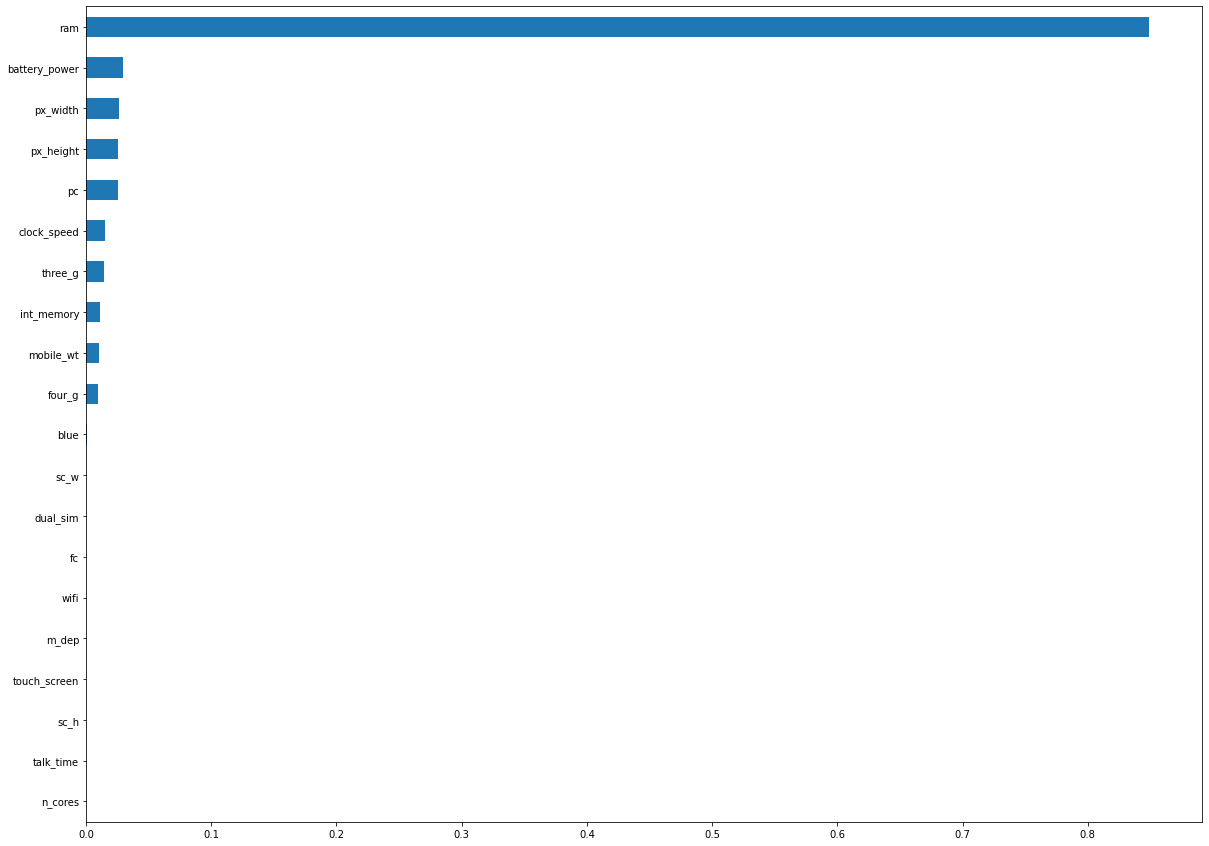

In [41]:
data.sort_values().plot(kind='barh')

In [44]:
data.sort_values(ascending=False)

ram              0.848848
battery_power    0.029257
px_width         0.026163
px_height        0.025531
pc               0.025333
clock_speed      0.015396
three_g          0.014042
int_memory       0.010751
mobile_wt        0.010249
four_g           0.009413
blue             0.000341
sc_w             0.000303
m_dep            0.000000
n_cores          0.000000
fc               0.000000
dual_sim         0.000000
sc_h             0.000000
talk_time        0.000000
touch_screen     0.000000
wifi             0.000000
dtype: float64